### Example: `sglib.HMM`


In [57]:
import sys 
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sglib.methods.parametric.hmm import HMM
from sglib.utils import load_example_data
from sglib.plotting.plot import plot_autocorrelation, plot_fdc_ranges

from sglib.verification.drought import get_drought_metrics, calculate_ssi_values
from sglib.plotting.drought import drought_metric_scatter_plot
from sglib.methods.parametric.ThomasFiering import ThomasFieringGenerator
from sglib.plotting.plot import plot_autocorrelation, plot_fdc_ranges

Using default value False for kwarg deseasonalize.
Using default value False for kwarg standardize.
Using default value False for kwarg normalize.
Using default value 1 for kwarg timestep.
Using default value False for kwarg _is_fit.
Using default value False for kwarg verbose.


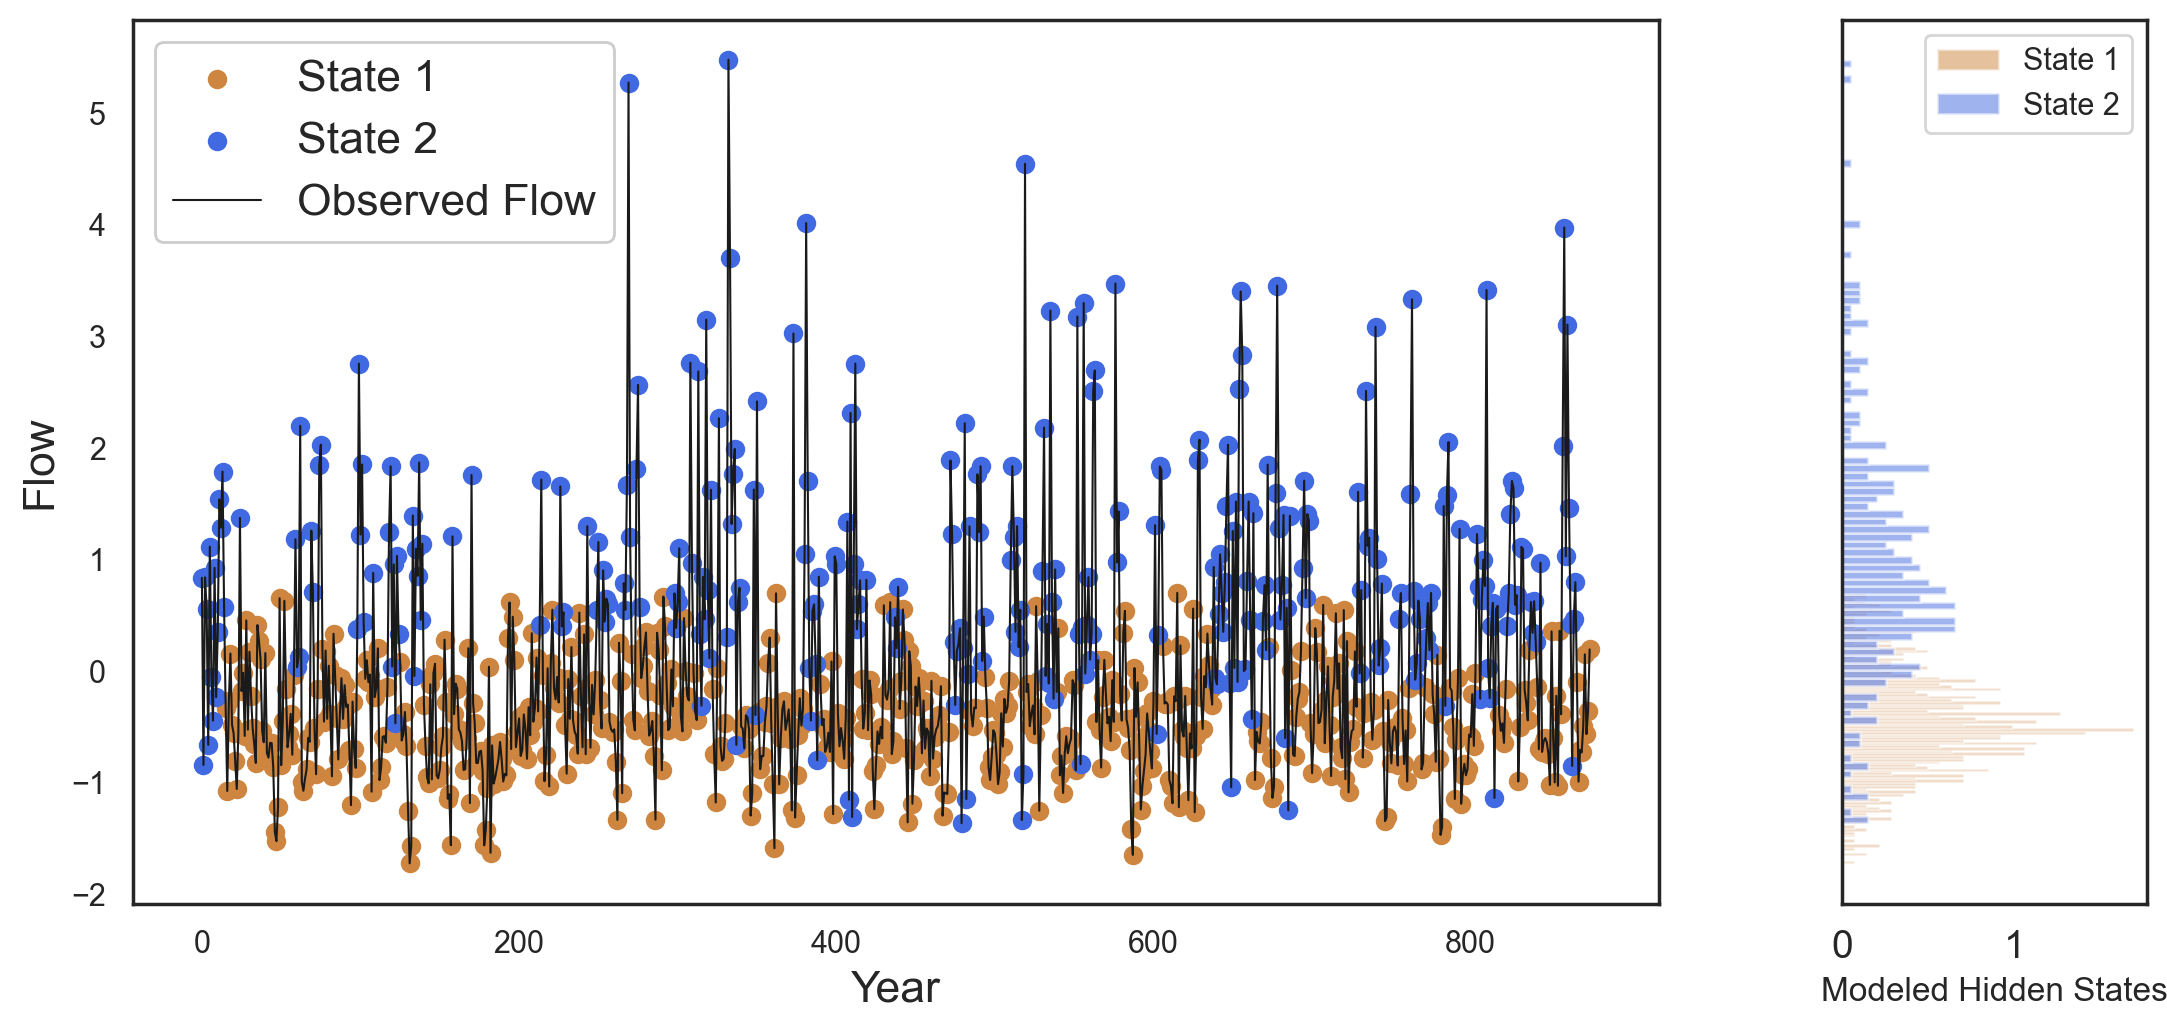

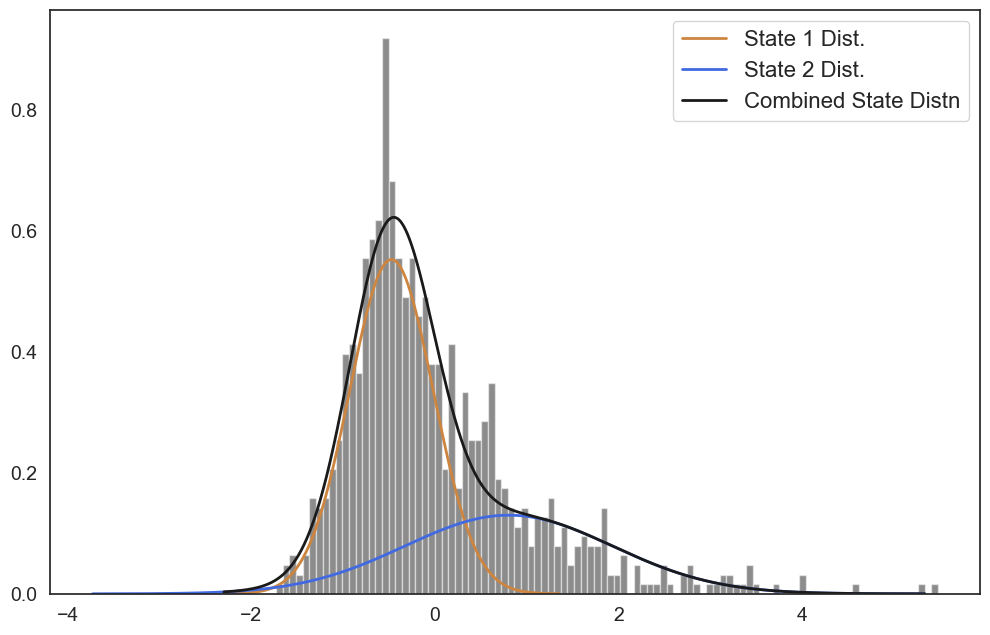

In [93]:
Q_obs = load_example_data()
aggregation = 'M'

test_Q = Q_obs.iloc[:, 2].resample(aggregation).mean()

# deseasonalize
if aggregation == 'M':
    month_means = test_Q.groupby(test_Q.index.month).mean()
    month_std = test_Q.groupby(test_Q.index.month).std()
    test_Q = (test_Q - month_means[test_Q.index.month].values) / month_std[test_Q.index.month].values

model = HMM(test_Q, 
            n_timesteps=(12*70),
            n_hidden_states=2, n_realizations=30, 
            max_iter=5000, tolerance=1e-12, 
            log_transform=True)
model.fit()

Q_syn = model.generate()
Q_syn = pd.DataFrame(Q_syn, index=pd.date_range(start='1950-01-01', periods=Q_syn.shape[0], freq='M'))
Q_syn.columns = [f'realization_{i}' for i in range(Q_syn.shape[1])]

# seasonalize
for month in range(1, 13):
    Q_syn.loc[Q_syn.index.month == month] = Q_syn.loc[Q_syn.index.month == month] * month_std[month] + month_means[month]

model.plot()

model.plot(kind='dist')

<Axes: >

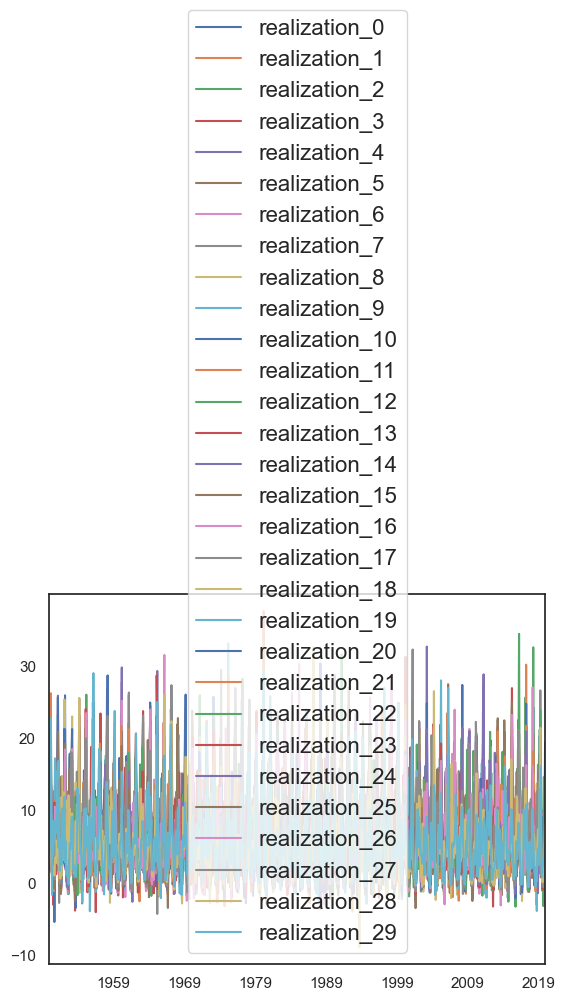

In [95]:
Q_syn.plot()

In [76]:
year_means

1950    2404.978098
1951    1857.103750
1952    1843.370079
1953    1270.322055
1954    1715.850824
           ...     
2018    2380.988065
2019    2119.119532
2020    1694.883898
2021    2552.925126
2022    1736.309746
Name: USGS-04234000, Length: 73, dtype: float64

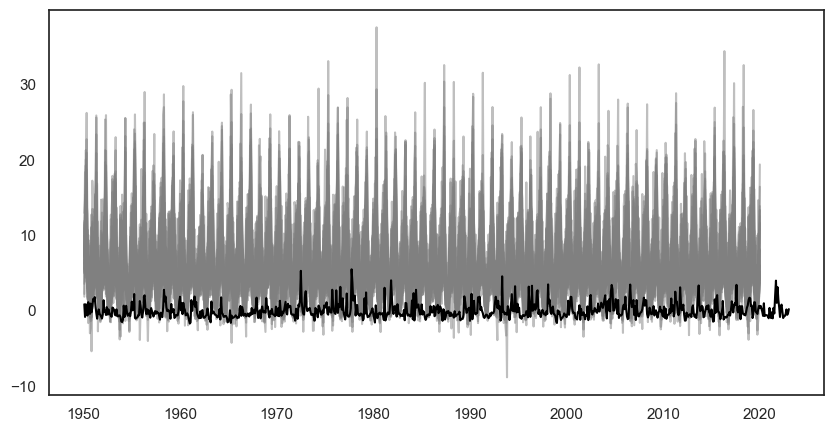

In [96]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1,figsize=(10,5))
for i in range(Q_syn.shape[1]):
    ax.plot(Q_syn.iloc[:,i], alpha = 0.5, color='grey')
ax.plot(test_Q, color='black', label='observed')

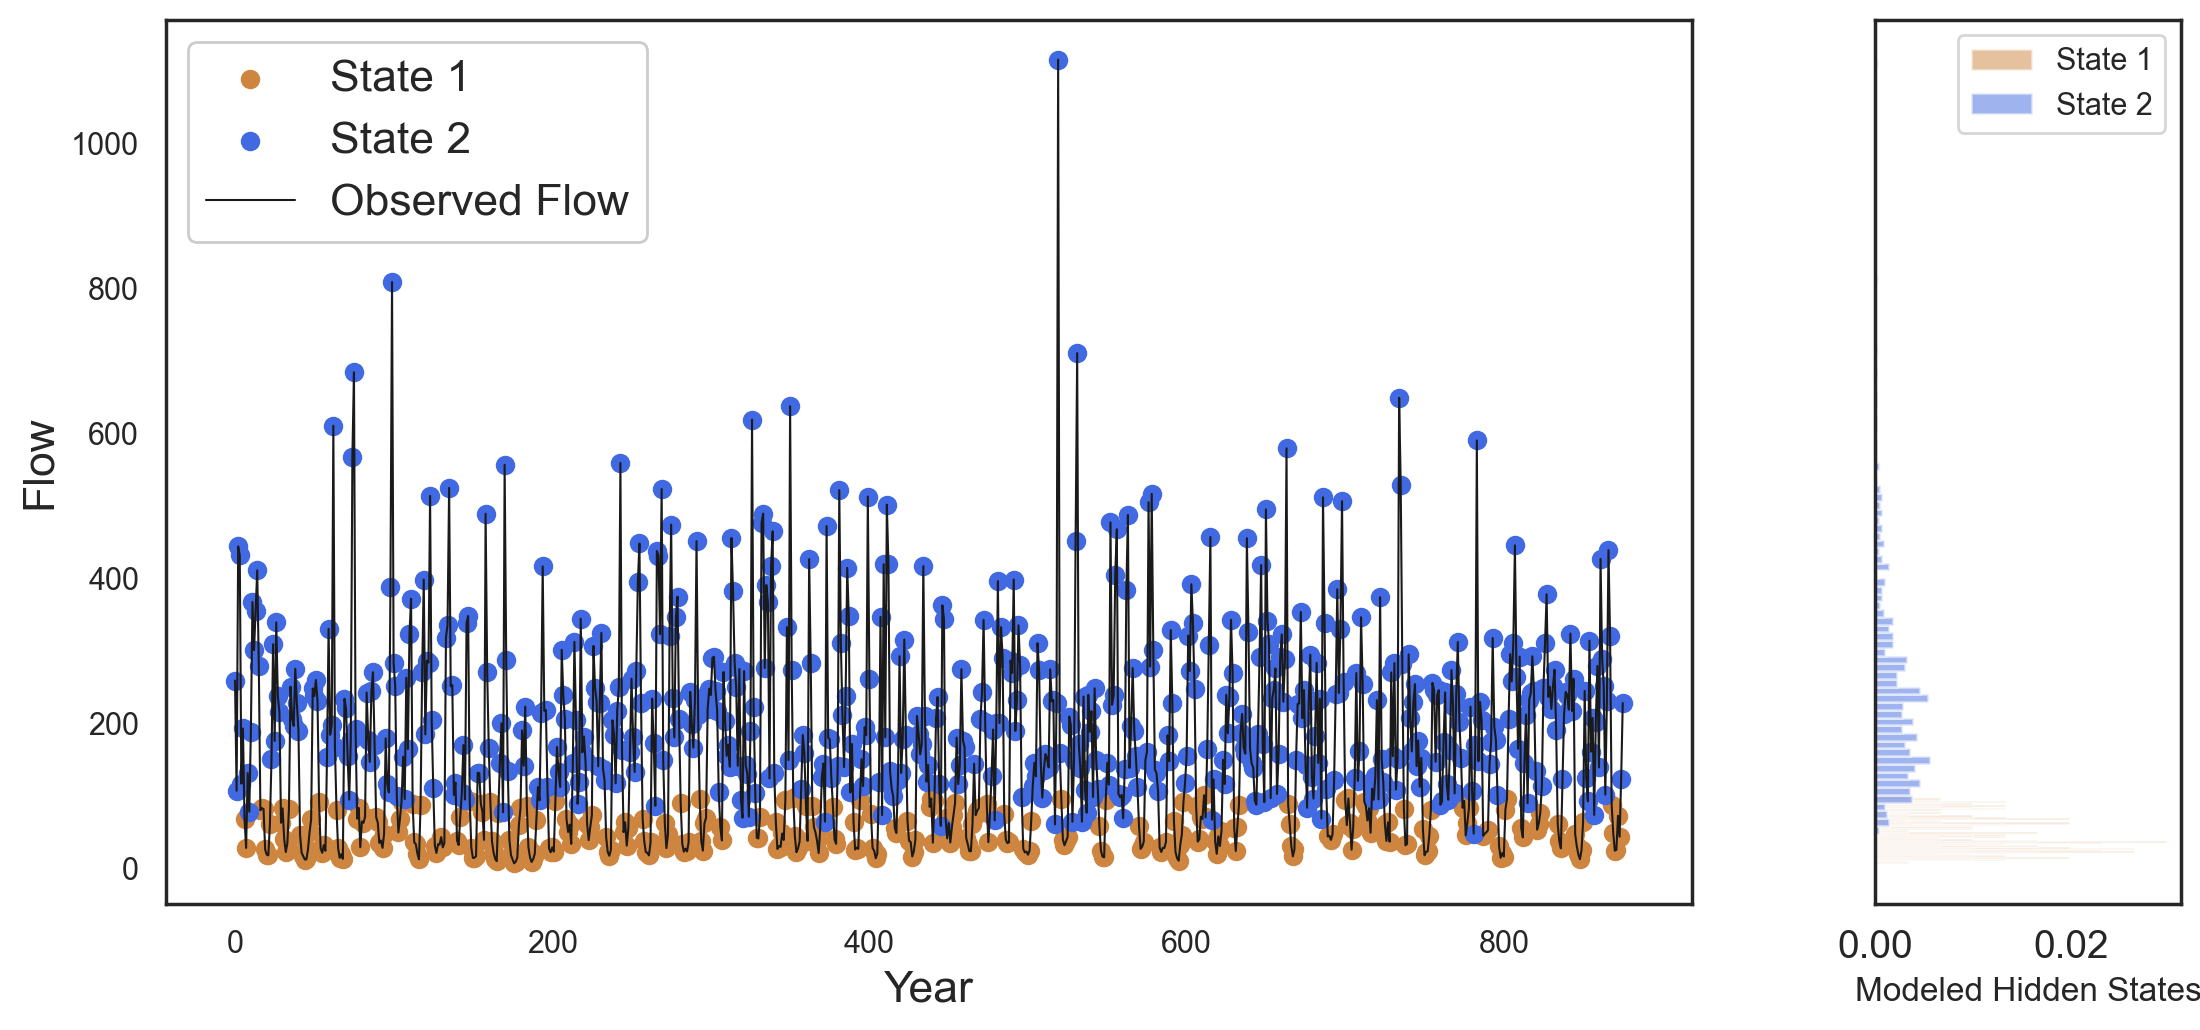

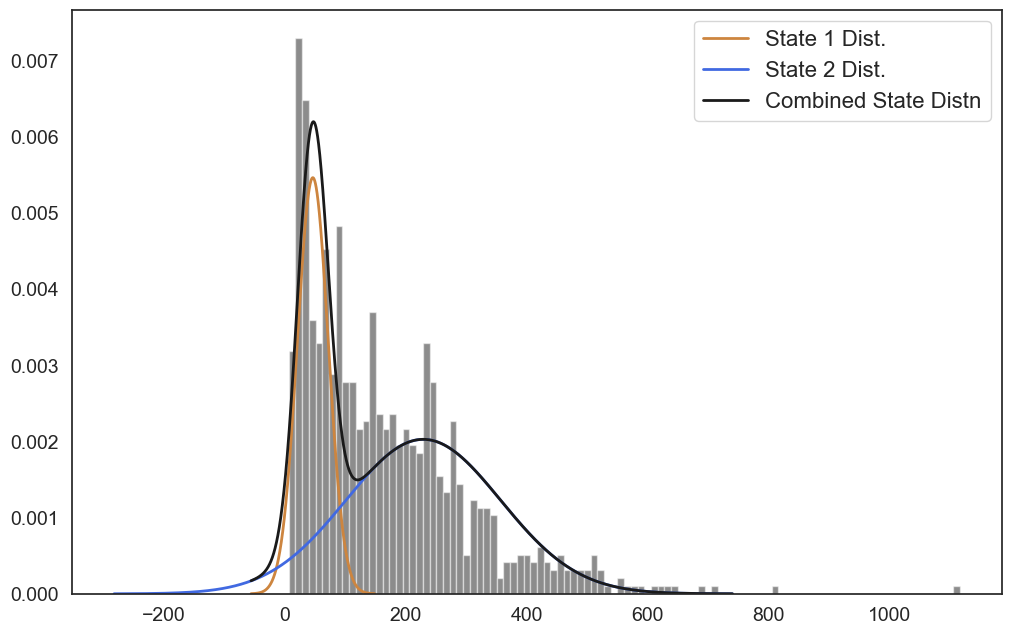

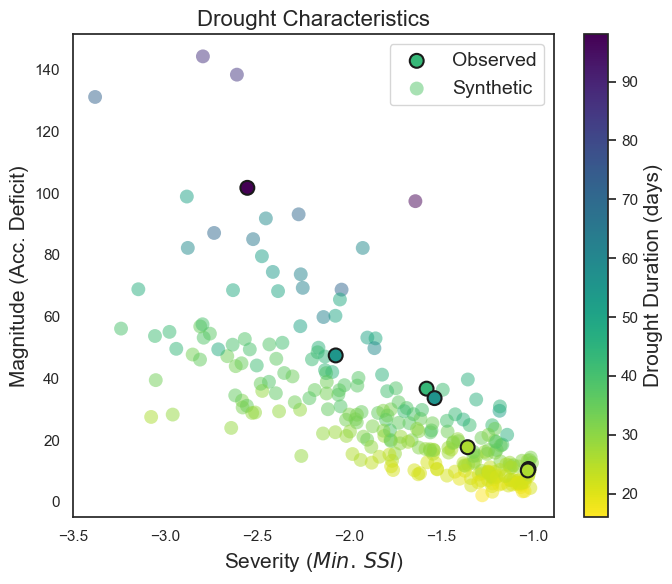

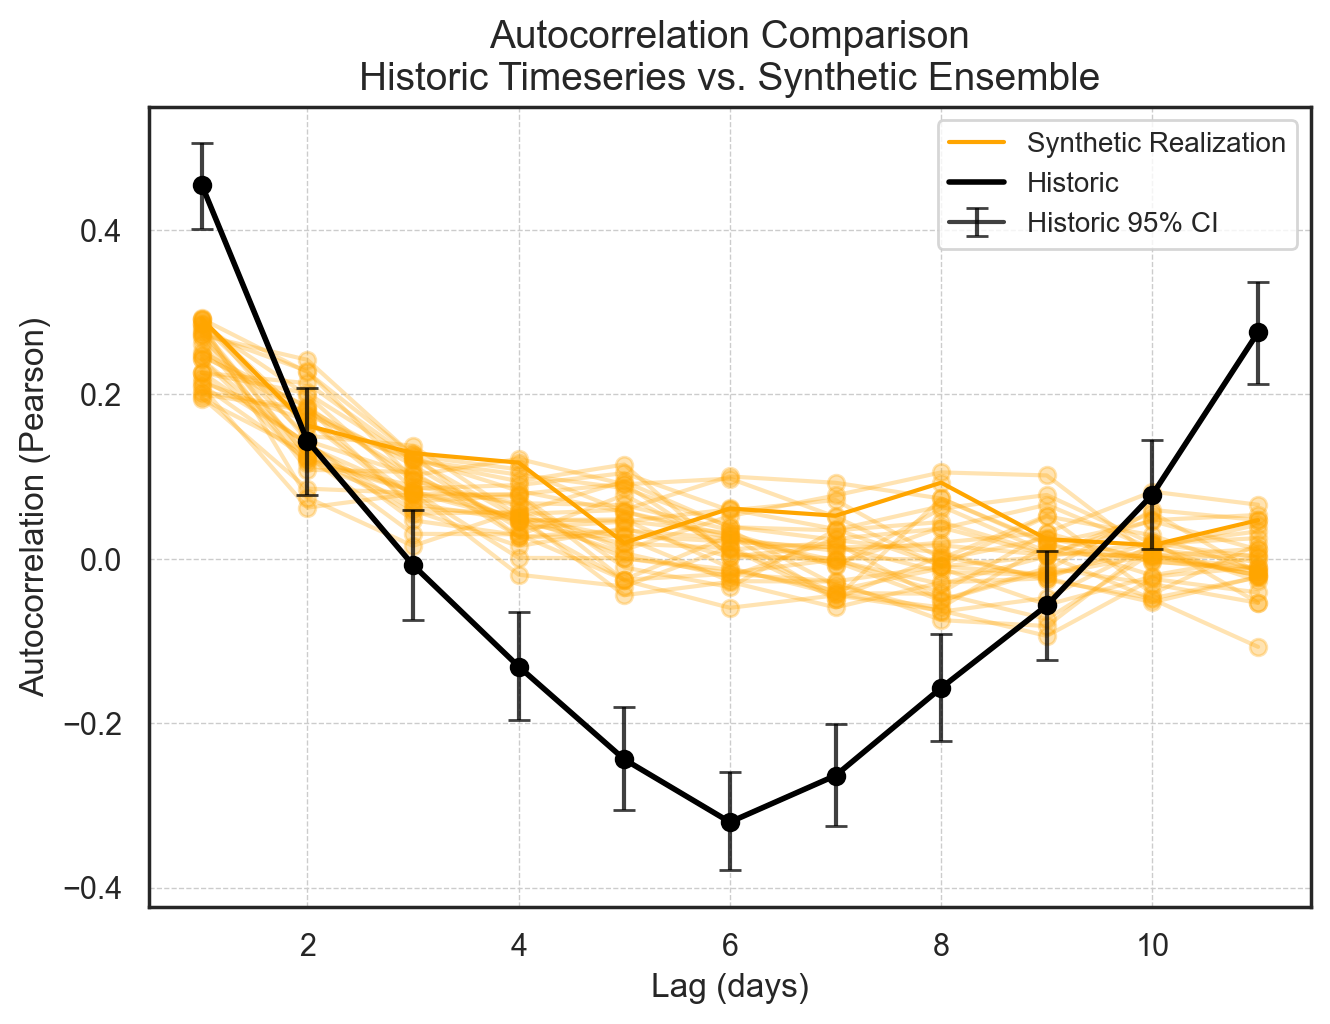

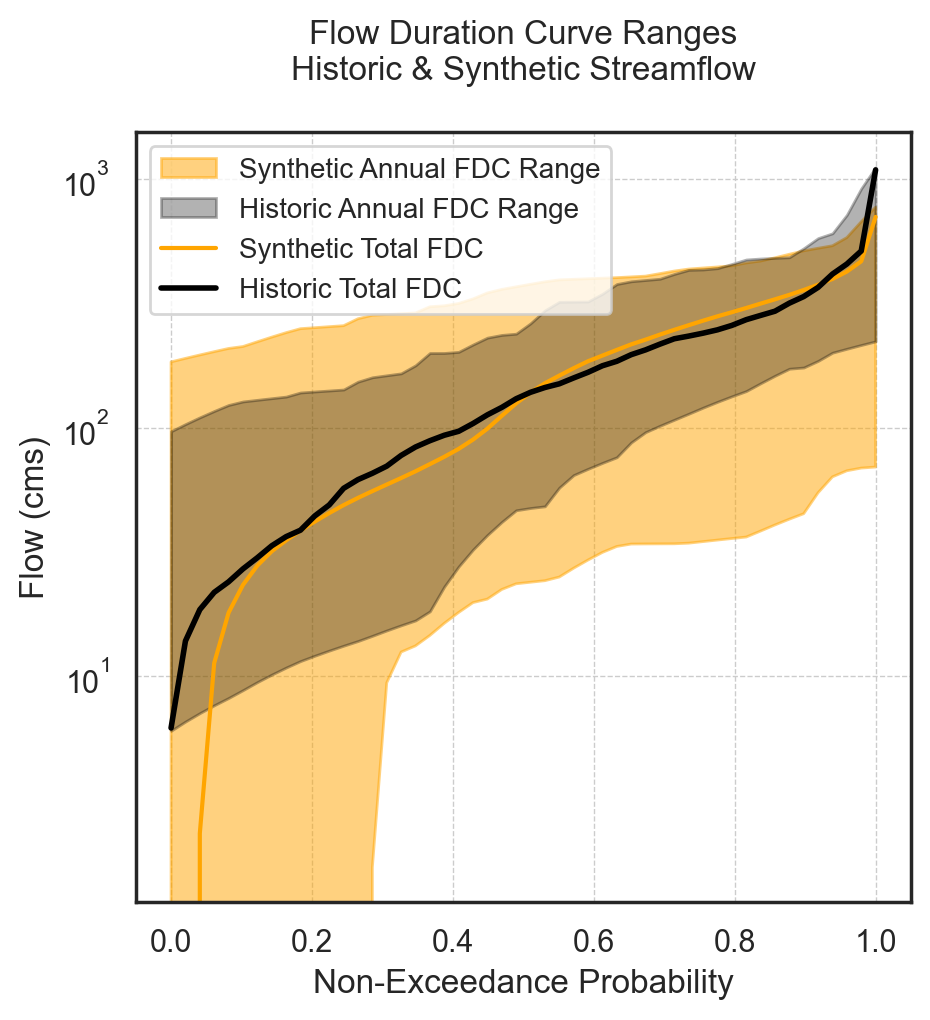

In [54]:
model.plot()

model.plot(kind='dist')

drought_metric_scatter_plot(get_drought_metrics(pd.DataFrame(test_Q), window=24), 
                            get_drought_metrics(Q_syn, window=24))

plot_autocorrelation(test_Q, Q_syn, lag_range=np.arange(1,12), timestep='daily')

plot_fdc_ranges(test_Q, Q_syn)

In [56]:
(Q_syn<0).sum()

realization_0     26
realization_1     22
realization_2     30
realization_3     24
realization_4     33
realization_5     35
realization_6     29
realization_7     34
realization_8     30
realization_9     31
realization_10    28
realization_11    49
realization_12    35
realization_13    30
realization_14    25
realization_15    35
realization_16    24
realization_17    42
realization_18    24
realization_19    32
realization_20    37
realization_21    39
realization_22    36
realization_23    34
realization_24    40
realization_25    35
realization_26    28
realization_27    28
realization_28    27
realization_29    26
dtype: int64